In [134]:
import numpy as np
import matplotlib.pyplot as plt
import time

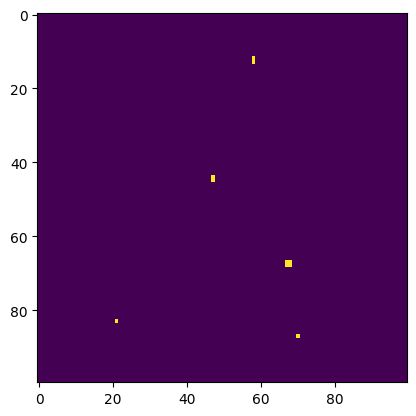

In [135]:
np.random.seed(0)
palette = np.zeros((100, 100))
for i in range(5):
    h = np.random.randint(0, 100)
    w = np.random.randint(0, 100)
    s1 = np.random.randint(1, 3)
    s2 = np.random.randint(1, 3)
    palette[h : h + s1, w : w + s2] = 1  # palette[h, w] = 1
plt.imshow(palette)

In [136]:
height, width = palette.shape
height, width

(100, 100)

In [137]:
def generate(palette: np.ndarray):
    # 填充1圈0,方便找上下左右
    palette_pad = np.pad(palette, 1, "constant", constant_values=0)
    # 复制一份负责保存结果
    temp_palette_pad = palette_pad.copy()
    for h in range(1, height + 1):
        for w in range(1, width + 1):
            # print(f"{h} {w}, {h-1} {w}, {h+1} {w}, {h} {w-1}, {h} {w+1}")
            # 判断上下左右是否为1
            if (
                palette_pad[h - 1, w]
                or palette_pad[h + 1, w]
                or palette_pad[h, w - 1]
                or palette_pad[h, w + 1]
            ):
                temp_palette_pad[h, w] = 1

    return temp_palette_pad[1:-1, 1:-1]

In [138]:
palettes = [palette]
palettes.extend(generate(palettes[-1]) for _ in range(10))
palettes

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

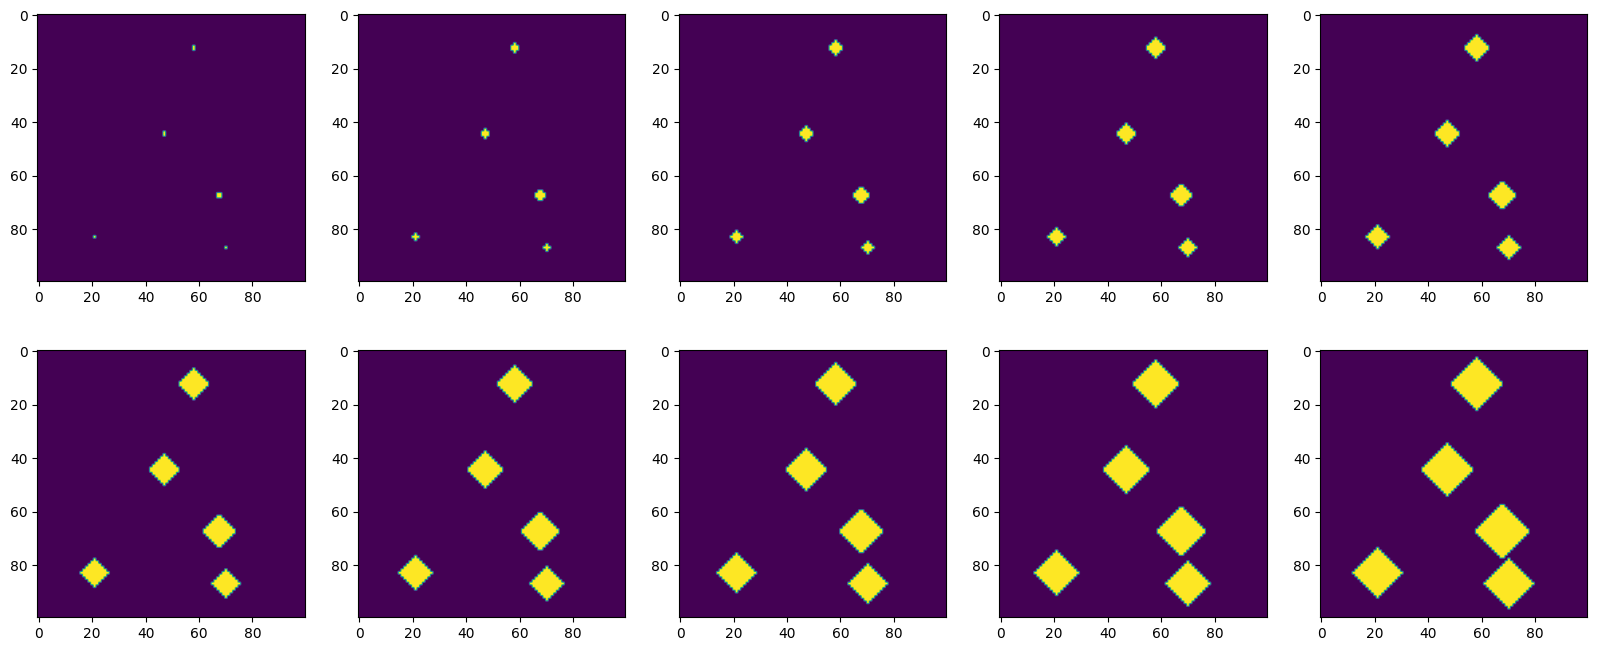

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for palette, ax in zip(palettes, axes.flatten()):
    ax.imshow(palette)